In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
URL2017 <- "https://drive.google.com/uc?id=11RimvDwqEXhi88RdmiHg6PUGOL8xXMW4&export=download"
URL2018 <- "https://drive.google.com/uc?id=1vA-vnvTlHoXV1q6bu4S_qay37nz7X3UM&export=download"
URL2019 <- "https://drive.google.com/uc?id=1kBSEJl-JCIzqzVmB9PMLZ-C2WM1hH7je&export=download"
URL2020 <- "https://drive.google.com/uc?id=1zaTH_62fMJNYMjWItzjSvrK3nKdK74Zn&export=download"
URL2021 <- "https://drive.google.com/uc?id=1Inz166gXuGusb47PhV6nQMEpxpl4Wh92&export=download"
URL2022 <- "https://drive.google.com/uc?id=1vUUblkLnMKSxb8S0y55Zi3IHjfIZOJ2N&export=download"
cr2017 <- read.csv(URL2017)
cr2018 <- read.csv(URL2018)
cr2019 <- read.csv(URL2019)
cr2020 <- read.csv(URL2020)
cr2021 <- read.csv(URL2021)
cr2022 <- read.csv(URL2022)

In [3]:
# combine 6 years into one dataframe
cr2017_2022 <- rbind(cr2017,cr2018,cr2019,cr2020,cr2021,cr2022)
head(cr2017_2022)

# only select the TYPE, YEAR, NEIGHBOURHOOD for analysis
crime2017_2022 <- cr2017_2022 %>% 
    select(TYPE, YEAR, MONTH, DAY, NEIGHBOURHOOD) 
head(crime2017_2022)


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2017,11,29,20,0,29XX SKEENA ST,Renfrew-Collingwood,497919.2,5456148
2,Theft of Vehicle,2017,6,21,21,0,2X JACKSON AVE,Strathcona,493220.8,5459096
3,Theft of Vehicle,2017,9,21,18,0,2X W 14TH AVE,Mount Pleasant,492319.5,5456190
4,Theft of Vehicle,2017,5,9,15,30,2X W PENDER ST,Central Business District,492338.0,5458667
5,Theft of Vehicle,2017,10,9,6,0,2XX ALEXANDER ST,Strathcona,492802.5,5459038
6,Theft of Vehicle,2017,6,13,6,45,2XX CENTRAL ST,Strathcona,492756.6,5457623


,TYPE,YEAR,MONTH,DAY,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<chr>
1,Theft of Vehicle,2017,11,29,Renfrew-Collingwood
2,Theft of Vehicle,2017,6,21,Strathcona
3,Theft of Vehicle,2017,9,21,Mount Pleasant
4,Theft of Vehicle,2017,5,9,Central Business District
5,Theft of Vehicle,2017,10,9,Strathcona
6,Theft of Vehicle,2017,6,13,Strathcona


In [4]:
# overal daily total crime incidents for each neighborhood in each year
crime_total <- crime2017_2022 %>%
    group_by(YEAR, DAY, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD != "") %>%
    summarise(total = n(), `.groups` = "drop")
head(crime_total)

YEAR,DAY,NEIGHBOURHOOD,total
<int>,<int>,<chr>,<int>
2017,1,Arbutus Ridge,13
2017,1,Central Business District,439
2017,1,Dunbar-Southlands,17
2017,1,Fairview,80
2017,1,Grandview-Woodland,79
2017,1,Hastings-Sunrise,60


In [5]:
# daily analysis 
# daily average crime incidents for each neighborhood in each year
crime_daily_avg <- crime_total %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(daily_avg = mean(total))
head(crime_daily_avg)

# daily median  for crime incidents for each neighborhood in each year
crime_daily_median <- crime_total %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(daily_median = median(total))
head(crime_daily_median)

# daily standard deviation for crime incidents for each neighborhood in each year
crime_daily_sd <- crime_total %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(daily_sd = sd(total))
head(crime_daily_sd)

NEIGHBOURHOOD,daily_avg
<chr>,<dbl>
Arbutus Ridge,10.47486
Central Business District,348.02151
Dunbar-Southlands,13.64205
Fairview,59.44086
Grandview-Woodland,57.51613
Hastings-Sunrise,39.24176


NEIGHBOURHOOD,daily_median
<chr>,<dbl>
Arbutus Ridge,11.0
Central Business District,373.0
Dunbar-Southlands,14.0
Fairview,65.5
Grandview-Woodland,64.5
Hastings-Sunrise,43.0


NEIGHBOURHOOD,daily_sd
<chr>,<dbl>
Arbutus Ridge,5.195415
Central Business District,163.014606
Dunbar-Southlands,6.610143
Fairview,27.608053
Grandview-Woodland,26.301829
Hastings-Sunrise,17.319768


In [6]:
# yearly analysis
# yearly average crime incidents for each neighborhood
crime_yearly_avg <- crime_total %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarise(yearly_avg = mean(total), `.groups` = "drop")
head(crime_yearly_avg)

# yearly median for crime incidents for each neighborhood
crime_yearly_median <- crime_total %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarise(yearly_median = median(total), `.groups` = "drop")
head(crime_yearly_median)

# yearly standard deviation for crime incidents for each neighborhood
crime_yearly_sd <- crime_total %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarise(yearly_sd = sd(total), `.groups` = "drop")
head(crime_yearly_sd)

YEAR,NEIGHBOURHOOD,yearly_avg
<int>,<chr>,<dbl>
2017,Arbutus Ridge,13.87097
2017,Central Business District,431.80645
2017,Dunbar-Southlands,16.74194
2017,Fairview,69.93548
2017,Grandview-Woodland,77.48387
2017,Hastings-Sunrise,46.32258


YEAR,NEIGHBOURHOOD,yearly_median
<int>,<chr>,<dbl>
2017,Arbutus Ridge,13
2017,Central Business District,435
2017,Dunbar-Southlands,16
2017,Fairview,73
2017,Grandview-Woodland,80
2017,Hastings-Sunrise,46


YEAR,NEIGHBOURHOOD,yearly_sd
<int>,<chr>,<dbl>
2017,Arbutus Ridge,4.595229
2017,Central Business District,57.918575
2017,Dunbar-Southlands,4.304786
2017,Fairview,13.339004
2017,Grandview-Woodland,11.595605
2017,Hastings-Sunrise,8.711629


In [7]:
# highest average daily cirme incident rate
daily_highest <- max(crime_daily_avg$daily_avg)
highest_area <- crime_daily_avg$NEIGHBOURHOOD[which.max(crime_daily_avg$daily_avg)]
daily_highest
highest_area

# lowest average daily cirme incident rate
daily_lowest <- min(crime_daily_avg$daily_avg)
lowest_area <- crime_daily_avg$NEIGHBOURHOOD[which.min(crime_daily_avg$daily_avg)]
daily_lowest
lowest_area


[1] 348.0215

[1] "Central Business District"

[1] 1.705263

[1] "Musqueam"

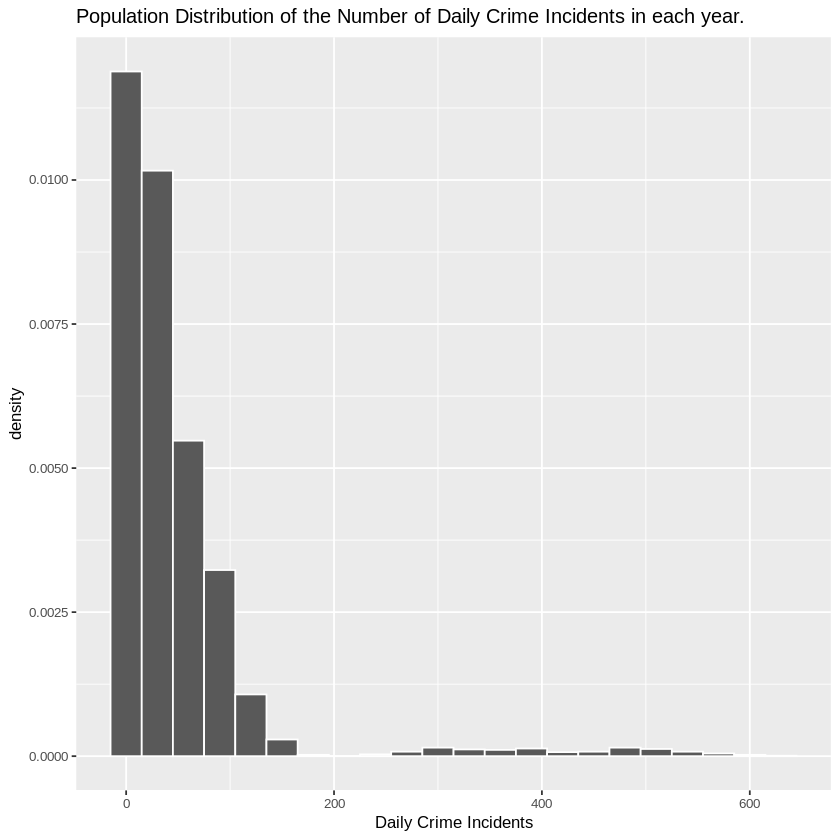

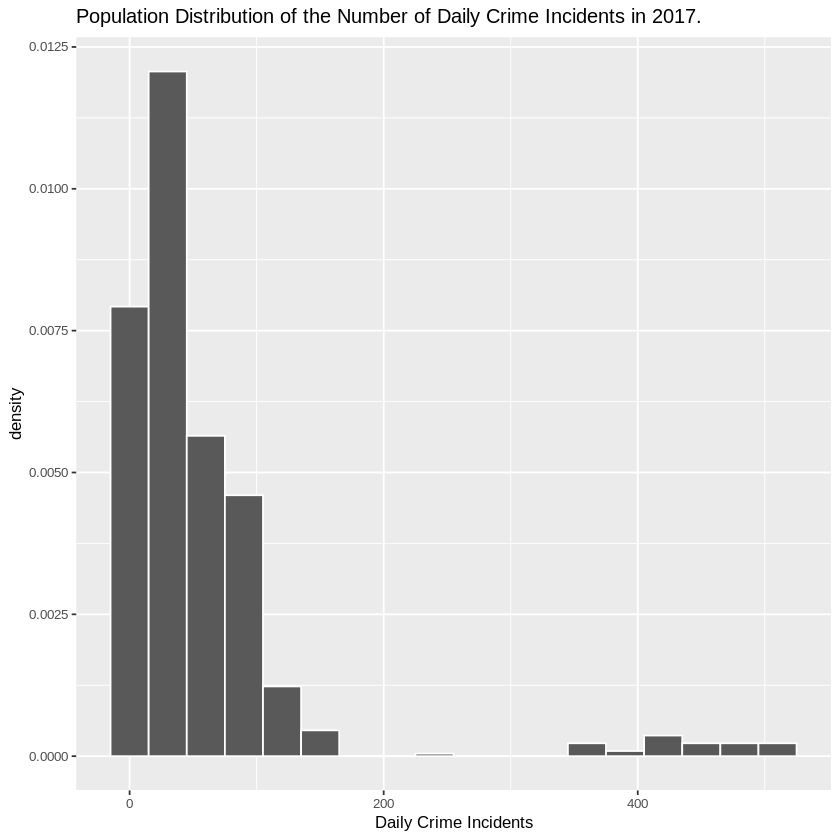

In [8]:
# visualization : population distribution
pop_dist <- crime_total %>%
    ggplot() + 
    geom_histogram(aes(x = total, y = ..density..), binwidth = 30, color="white") +
    theme(text = element_text(size = 10))+
    xlab("Daily Crime Incidents") +
    ggtitle("Population Distribution of the Number of Daily Crime Incidents in each year.")
pop_dist
# population distribution for 2017
pop_dist_2017 <- crime_total %>%
    filter(YEAR == 2017) %>%
    ggplot() + 
    geom_histogram(aes(x = total, y = ..density..), binwidth = 30, color="white") +
    theme(text = element_text(size = 10))+
    xlab("Daily Crime Incidents") +
    ggtitle("Population Distribution of the Number of Daily Crime Incidents in 2017.")
pop_dist_2017

DAY,replicate,sample_mean
<int>,<int>,<dbl>
1,1,73.46154
1,2,71.84211
1,3,34.20000
1,4,47.93750
1,5,70.73333
1,6,50.73684


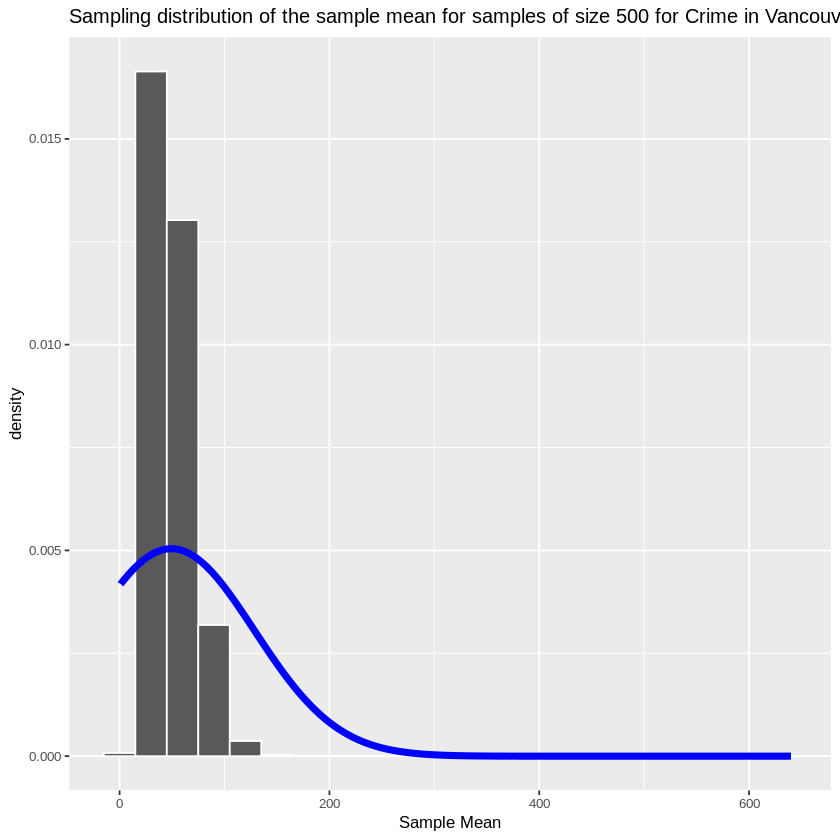

In [9]:
# CLT with sample size 500
pop_mu <- mean(crime_total$total)
pop_sd <- sd(crime_total$total)


sample_500 <- crime_total %>%
    rep_sample_n(size = 500, reps = 10000, replace = FALSE) %>%
    group_by(DAY, replicate) %>% 
    summarise(sample_mean = mean(total), `.groups` = "drop")
head(sample_500)

data_normal <- tibble(total=seq(min(crime_total$total), 
                                max(crime_total$total),0.01), 
                                density = dnorm(total, pop_mu, pop_sd))

sampling_dist_500 <- sample_500 %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_mean, y = ..density..), binwidth = 30, color="white") +
    theme(text = element_text(size = 10))+
    xlab("Sample Mean") +
    ggtitle("Sampling distribution of the sample mean for samples of size 500 for Crime in Vancouver from 2017-2022.") + 
    geom_line(data = data_normal, aes(total, density), color = "blue", lwd = 2)
sampling_dist_500

DAY,replicate,sample_mean
<int>,<int>,<dbl>
1,1,31.28571
1,2,52.11111
1,3,54.45833
1,4,54.43478
1,5,63.27273
1,6,60.26316


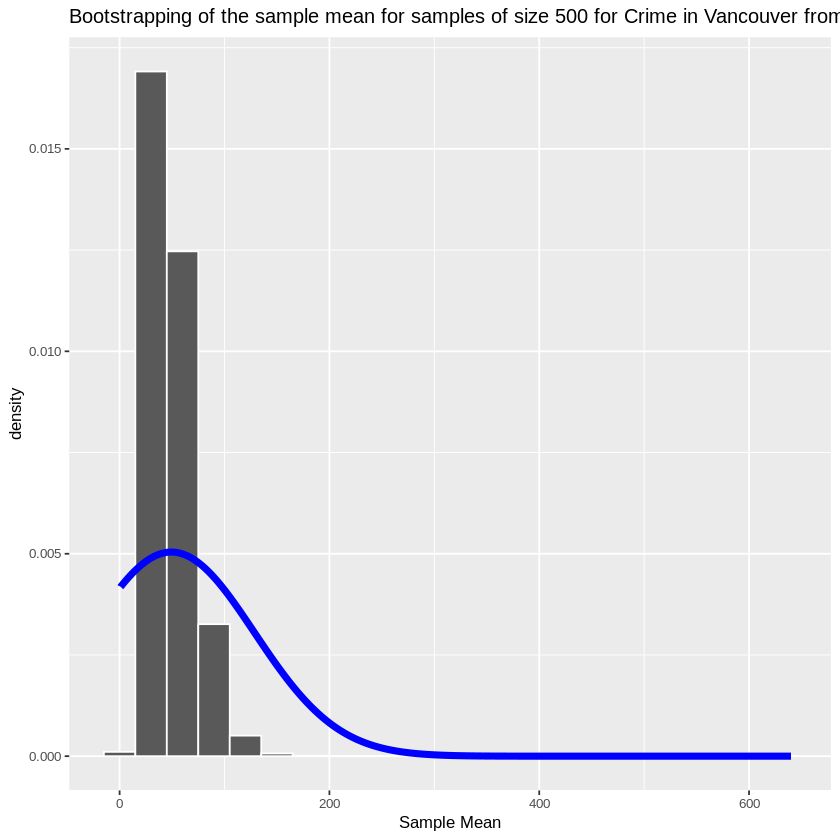

In [10]:
# Bootstrap with sample size 500
one_sample <- crime_total %>%
    rep_sample_n(size = 500, reps = 1, replace = FALSE)
boot_500 <- one_sample %>%
    rep_sample_n(size = 500, reps = 10000, replace = TRUE) %>%
    group_by(DAY, replicate) %>% 
    summarise(sample_mean = mean(total), `.groups` = "drop")
head(boot_500)

bootstrap_500 <- boot_500 %>% 
    ggplot() + 
    geom_histogram(aes(x = sample_mean, y = ..density..), binwidth = 30, color="white") +
    theme(text = element_text(size = 10))+
    xlab("Sample Mean") +
    ggtitle("Bootstrapping of the sample mean for samples of size 500 for Crime in Vancouver from 2017-2022.") + 
    geom_line(data = data_normal, aes(total, density), color = "blue", lwd = 2)
bootstrap_500
